In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import os
import random
import skimage.io
from skimage import img_as_float
from skimage.util import random_noise

ROOT_DIR = os.path.abspath(".")
ORG_IMAGE_DIR = os.path.join(ROOT_DIR, "original_images")
NOI_IMAGE_DIR = os.path.join(ROOT_DIR, "noisy_images")

In [2]:
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = img_as_float(imread(os.path.join(folder,filename)))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames


original_images, original_filenames = load_images_from_folder(ORG_IMAGE_DIR)

print(f"Successfully uploaded {len(original_images)} images from directory {ORG_IMAGE_DIR}")

Successfully uploaded 100 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\original_images


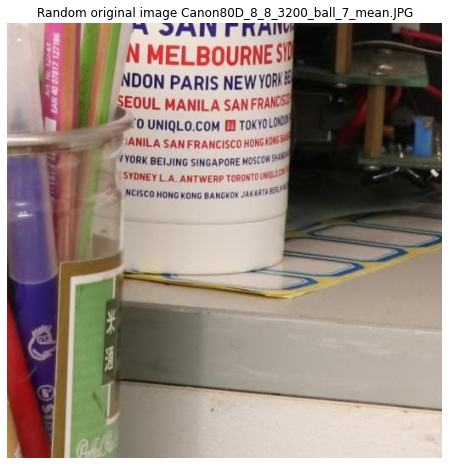

In [3]:
random_org_image = random.choice(original_images)
random_org_filename = None

for file, img in zip(original_filenames, original_images):
    if img is random_org_image:
        random_org_filename = file

#plot_img = 'all'
plot_img = 'one'

if plot_img == 'all':
    for file, img in zip(original_filenames, original_images):
        plt.figure(figsize=(8,8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Original image {file}')
        plt.show()
else:
    plt.figure(figsize=(8,8))
    plt.imshow(random_org_image)
    plt.axis('off')
    plt.title(f'Random original image {random_org_filename}')
    plt.show() 

In [4]:
def add_gaussian_noise(image, sigma):
    noisy = skimage.util.random_noise(image, var=sigma**2) 
    return noisy

In [5]:
def save_noisy_images(filenames, images, output_dir):
    sigmas = [0.1, 0.25, 0.5, 1]
    for i in range(len(sigmas)):
        for file, img in zip(filenames, images):
            noisy = add_gaussian_noise(img, sigmas[i])
            split_file = file.split(".")[0]
            if i==0:
                noisy_path = f'{output_dir}/sig01/noisy_{split_file}_sig01.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==1:
                noisy_path = f'{output_dir}/sig025/noisy_{split_file}_sig025.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==2:
                noisy_path = f'{output_dir}/sig05/noisy_{split_file}_sig025.JPG'
                plt.imsave(noisy_path, noisy)
            elif i==3:
                noisy_path = f'{output_dir}/sig1/noisy_{split_file}_sig1.JPG'
                plt.imsave(noisy_path, noisy)
               
            
save_noisy_images(original_filenames, original_images, NOI_IMAGE_DIR)

In [6]:
SIG_01_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig01")
SIG_025_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig025")
SIG_05_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig025")
SIG_1_NOI_DIR = os.path.join(NOI_IMAGE_DIR, "sig1")


noisy_images_01, noisy_filenames_01 = load_images_from_folder(SIG_01_NOI_DIR)
noisy_images_025, noisy_filenames_025 = load_images_from_folder(SIG_025_NOI_DIR)
noisy_images_05, noisy_filenames_05 = load_images_from_folder(SIG_05_NOI_DIR)
noisy_images_1, noisy_filenames_1 = load_images_from_folder(SIG_1_NOI_DIR)

print(f"Successfully uploaded {len(noisy_images_01)} images from directory {SIG_01_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_025)} images from directory {SIG_025_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_05)} images from directory {SIG_05_NOI_DIR}")
print(f"Successfully uploaded {len(noisy_images_1)} images from directory {SIG_1_NOI_DIR}")

Successfully uploaded 100 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\noisy_images\sig01
Successfully uploaded 100 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\noisy_images\sig025
Successfully uploaded 100 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\noisy_images\sig025
Successfully uploaded 100 images from directory C:\Users\patry\Documents\STUDIA\MGR\I_SEMESTR\OPSI\projekt\Image-Denoising\noisy_images\sig1


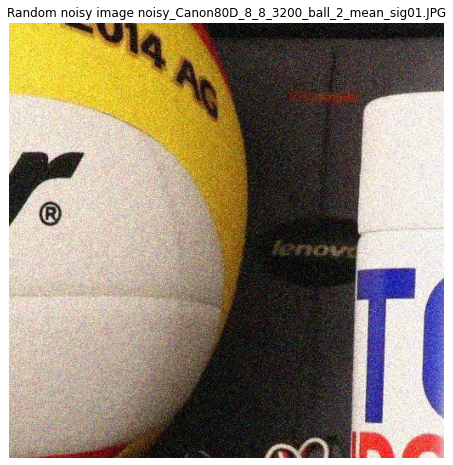

In [7]:
# Display the same random image as original
# random_noisy_image = None
# random_noisy_filename = None

# for file, img in zip(noisy_filenames_01, noisy_images_01):
#     if random_org_filename in file:
#         random_noisy_filename = file
#         random_noisy_image = img

random_noisy_image = random.choice(noisy_images_01)
random_noisy_filename = None

for file, img in zip(noisy_filenames_01, noisy_images_01):
    if img is random_noisy_image:
        random_noisy_filename = file

plot_img = 'one'
if plot_img == 'all':
    for file, img in zip(noisy_filenames_01, noisy_images_01):
        plt.figure(figsize=(8,8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Noisy image {file}', fontdict=None, loc='center', pad=None)
        plt.show()
else:
    plt.figure(figsize=(8,8))
    plt.imshow(random_noisy_image)
    plt.axis('off')
    plt.title(f'Random noisy image {random_noisy_filename}', fontdict=None, loc='center', pad=None)
    plt.show()